# Tracking movement in a microscopy image
This notebook shows how to import, visualize and analyze data from a microscopy experiment. In particular, we will track the changing position of a moving object (a myosin molecular motor in a protein droplet), and use simple graphing to find what the velocity of this object is.
The first cell below imports some very useful python language tools that computer programmers have developed and that is free for all of us to use!

In [1]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
from skimage import io

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from plotly.offline import iplot
import plotly.graph_objects as go
import plotly.express as px
#%matplotlib inline

import pandas as pd


## Importing the data
In the following cell, we import two files necessary for the subsequent analysis from some online cloud storage links where I have already shared these files.  These files are:
1. the microscopy **image** of the moving myosin motor within a droplet. This is named "centering_myosin_partial.tif" and,
2. a csv **data** file (like an excel spreadsheet) of the coordinates of the bright myosin spots on the right as it moves towards the center of the droplet. called "PlotData.csv".

If this method of importing fails, we can also directly upload the files from our local computer using the second method which is currently commented out. Please use the link provided to download the two files the first.  After you execute the cell below, check the sidebar on the left (click the folder icon) to verify that the files have indeed been imported into this notebook.

The data is kindly provided by Dr. Kimberly Weirich. If you are interested in our collaborative research that showed "cell division" but outside a cell, please read this [news story](https://news.uchicago.edu/story/first-time-scientists-recreate-cell-division-outside-cell)

In [2]:
# https://github.com/kinjald/SummerOutreach/blob/master/centering_myosin_partial.tif
#!wget -O PlotData.csv https://github.com/kinjald/SummerOutreach/blob/master/PlotData.csv

!wget -O centering_myosin_partial.tif https://www.dropbox.com/s/04rws3arcza8u44/centering_myosin_partial.tif?dl=0
!wget -O PlotData.csv https://www.dropbox.com/s/cxz8udrl2454nel/PlotData.csv?dl=0

--2023-07-27 21:22:25--  https://www.dropbox.com/s/04rws3arcza8u44/centering_myosin_partial.tif?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/04rws3arcza8u44/centering_myosin_partial.tif [following]
--2023-07-27 21:22:25--  https://www.dropbox.com/s/raw/04rws3arcza8u44/centering_myosin_partial.tif
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca2320bdb45fceff2294f850007.dl.dropboxusercontent.com/cd/0/inline/CApyqWnHXGUAfpEHyOxP6ZBYK4dSkiC8Kddr8femDe2FPmS8uQJSstwUZKtmumGdAHFmua8kTC1nAIFTJ18zA6gQHH09vUgXMTSlvwXSz9qZyxk-CeU4B0TeBb3Maj3iKMoirxsZAH7Tzo9B31sc9slc/file# [following]
--2023-07-27 21:22:25--  https://uca2320bdb45fceff2294f850007.dl.dropboxusercontent.com/cd/0/inline/CApyqWnHXGUAfpEHyOxP6ZBYK4dSkiC8Kddr8femDe2FPmS8u

Two other methods to upload files from your local computer or from your google drive, respectively. We will not use these today. Use this only if the previous method fails.

In [3]:
#from google.colab import files
#uploaded = files.upload()

#from google.colab import drive
#drive.mount('/content/drive')

## Displaying the image
We use python's image library (skimage) functionality (io) to read in the microscopy image.  The image data is in fact stored as a two dimensional array of numbers.  This becomes clear when we explore the shape of the array.  We see that this data is in fact a stack of 13 images, each of size 150x190 pixels. Next, we show you a way to plot this image.

In [4]:
# plt.imread reads tif as a single image instead of as a stack of images. Use io.imread instead.
imp = io.imread('centering_myosin_partial.tif')
imp.shape

(13, 150, 190)

The following function uses matplotlib (the most popular plotting library in python) to build an interactive plot.

In [5]:
def plot(time):
    plt.figure(figsize=(10,10))
    plt.imshow(imp[time])
    ax = plt.gca();
    ax.set_xticks(np.arange(-.5, 180, 10), minor=True);
    ax.set_yticks(np.arange(-.5, 150, 10), minor=True);
    #ax.grid(which='minor', color='w', linestyle='-', linewidth=1)

interactive(children=(IntSlider(value=0, description='time', max=12), Output()), _dom_classes=('widget-interac…

<function __main__.plot(time)>

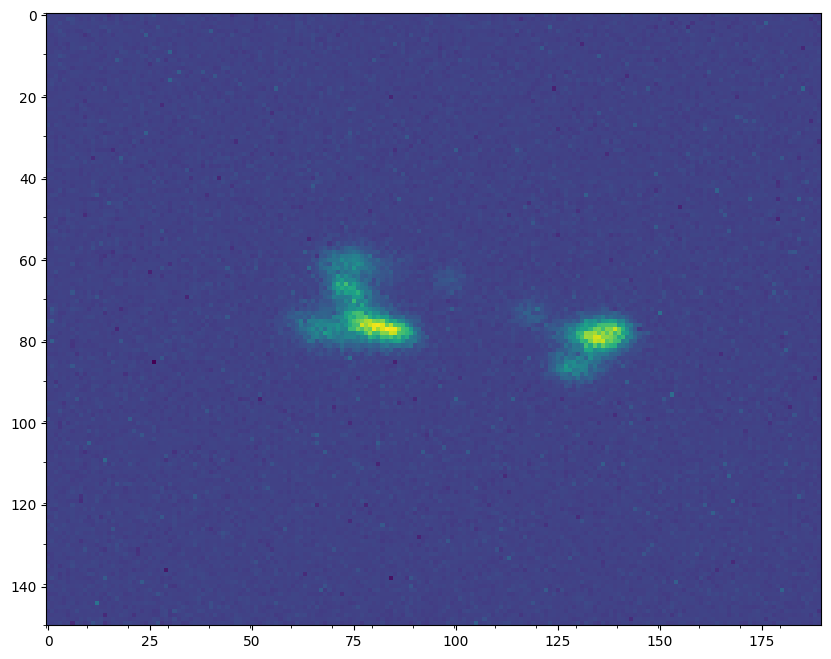

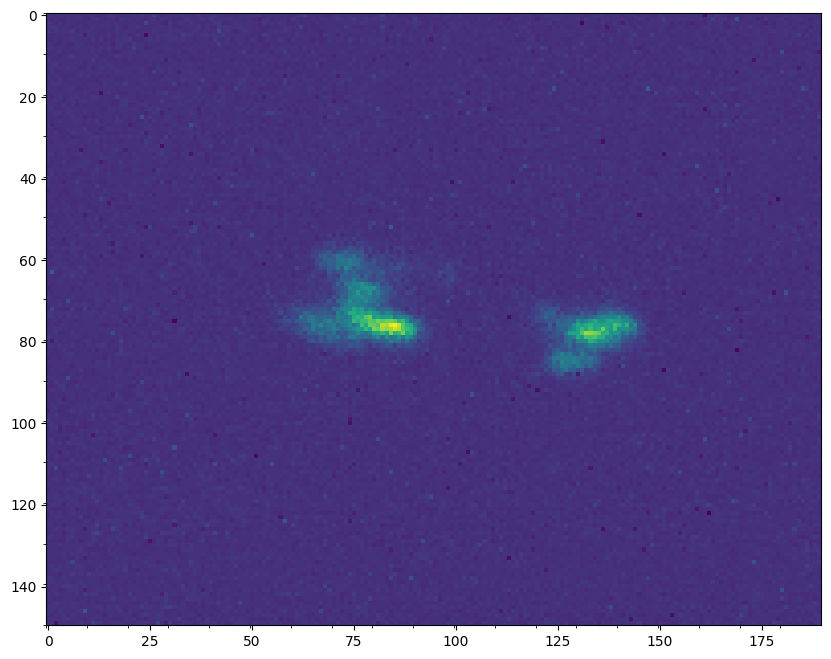

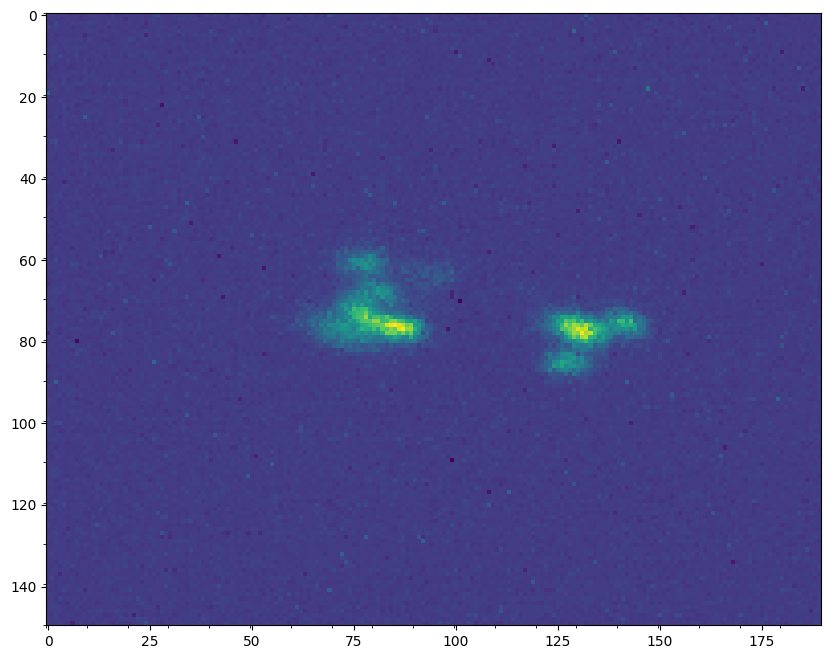

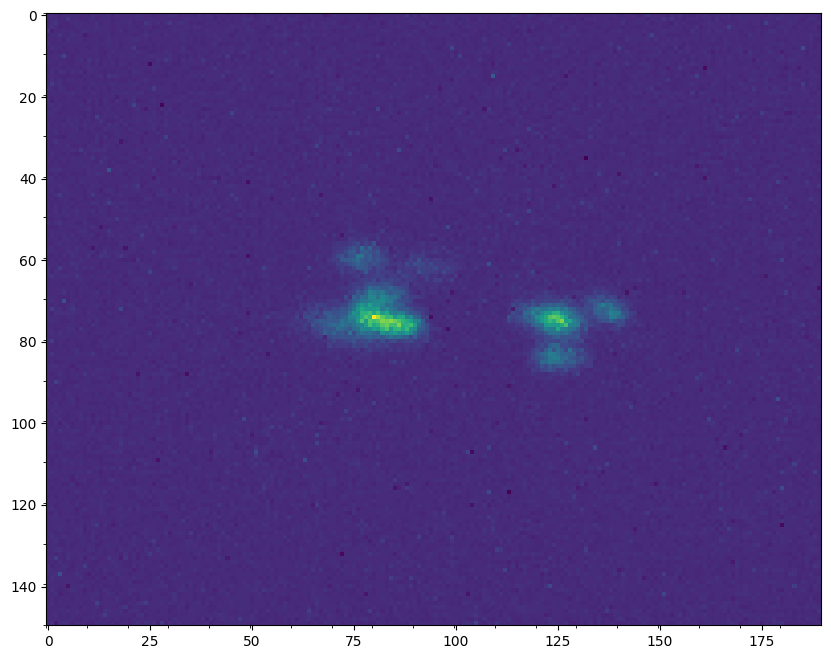

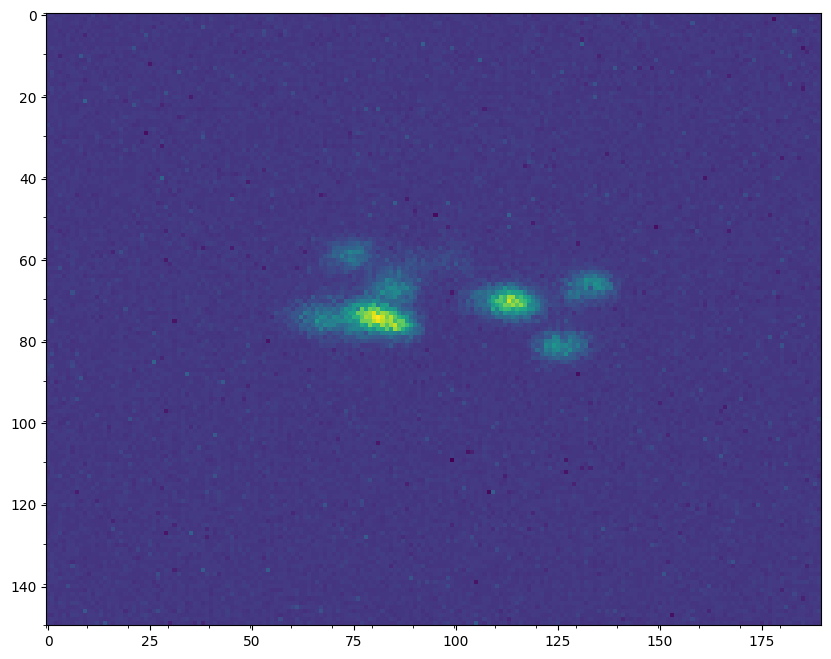

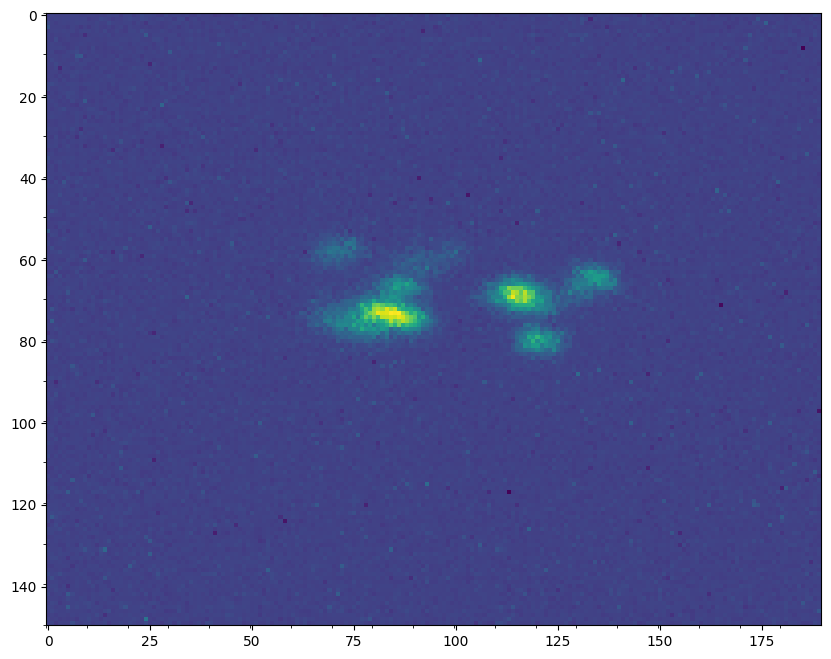

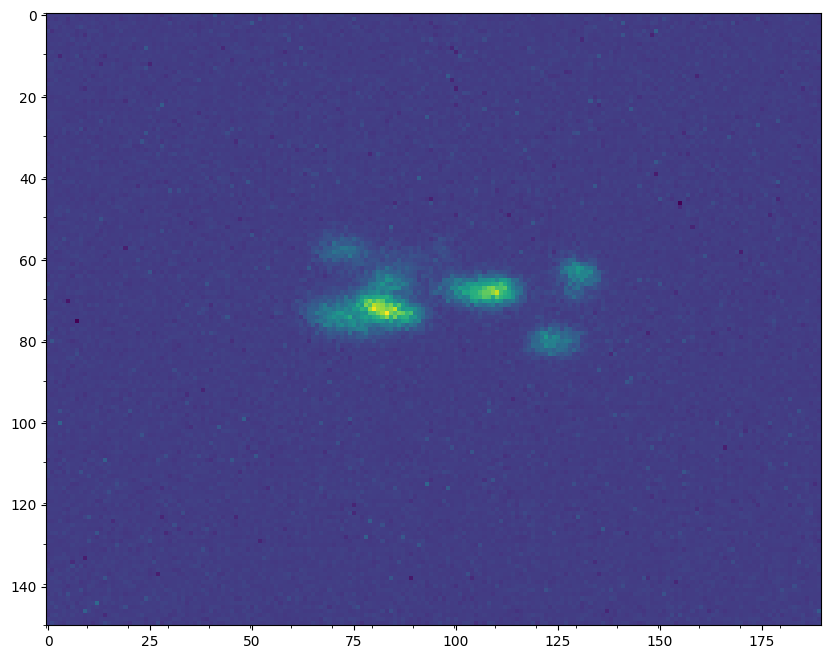

In [6]:
interact(plot, time = widgets.IntSlider(value=0, min=0, max=12, step=1))

## Analyzing the image
There is much useful information that can be extracted from a microscopy movie (A movie is nothing but a stack of still images).  Here, we show just one possible type of analysis: **Tracking**.  In other words, we will follow the motion of one of the myosin motors (bright patch, middle right) and see with what average speed it moves from right to left in the horizontal (x-axis) direction.

We will use another plotting tool called plotly below to do this tracking manually. After executing the cell below, hover your cursor over the generated plot to see the coordinates. You can choose which frame in this stack of 13 frames to plot.

In [7]:
# the frame_number runs from 0,1,2 .... to 12.  By varying this number, we can choose which frame of the stack of images to display.
frame_number = 7
fig = px.imshow(imp[frame_number])
fig.show()

In the above plots, you can see the pixel coordinates (x,y) by positioning your mouse cursor at the approximate center of the bright spot (a myosin motor) on the right. For example, for the first frame (frame_number =0), the approximate position at the center of the cursor is (135,79). Let's say we want to track the x coordinate only since the motor mainly moves from right to left.  

## Student exercise
For this exercise, you will work in small groups in breakout rooms. In the cell below, I have already filled out the x coordinates for each time frame except a few missing positions as a python (numpy) array.

x_vals = [135, 134, 134, , , 121, 117, , , 116, 112, , ]

Fill in the remaining positions (x coordinates only since the motion is mainly along the x axis) by plotting and hovering over the middle-right bright patch in the graphic above.  These  remaining frame numbers are: 3,4; 7,8; 11,12.  We will ask a representative from each breakout room to give us some of these numbers.
Then, fill in and uncomment the line that defines x_vals in the cell below.  Now you have the full data for the array called "x_vals"!

Then, when you execute the cell below you will have a  graph of x position vs. time. Such graphs are used by scientists to see how one quantity (here, the position of the myosin motor) changes with another (here, time or number of frames).

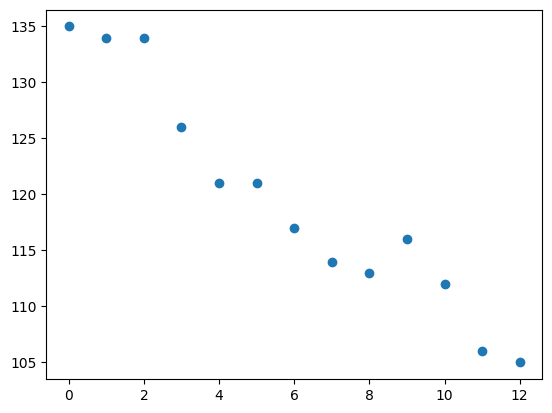

In [8]:
x_vals = [135, 134, 134, 126, 121, 121, 117, 114, 113, 116, 112, 106, 105]

t_vals = np.arange(0,13)
plt.plot(t_vals, x_vals,'o')

# Extracting velocity from data
The above graph shows you how the myosin motor particle moves in time. The data looks almost like a straight line suggesting that the myosin moves with a constant speed.  The speed is measured by the rate of change of position, or the slope of the trend line that passes through these data points (also called "line of best fit"). The following cells teach you how to obtain a line of best fit given the datapoints.  Before this workshop, I already stored the x and y positions of this myosin particle as a data file called "PlotData.csv". This data looks very similar to what we plotted above.

In [9]:
data = pd.read_csv("PlotData.csv")
data

,1,139,78.5
0,2,137,79.5
1,3,135,78.5
2,4,132,78.5
3,5,130,78.5
4,6,125,75.5
5,7,122,74.5
6,8,118,72.5
7,9,113,70.5
8,10,114,70.5
9,11,110,69.5


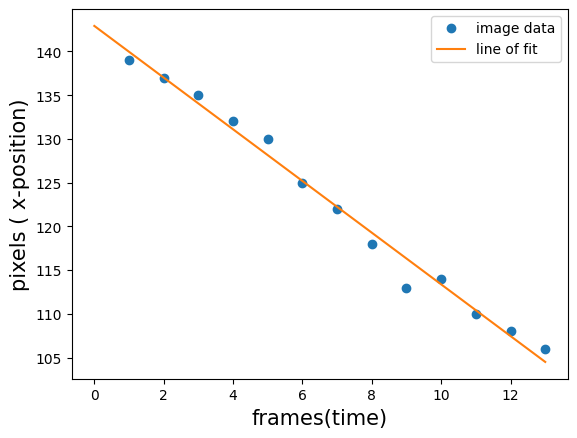

In [11]:
# data extraction as numpy arrays
t_data, x_data, y_data = np.loadtxt('PlotData.csv', delimiter=',', unpack=True)

# data fitting using numpy
mx,bx = np.polyfit(t_data, x_data, 1)
my,by = np.polyfit(t_data, y_data, 1)

# data visualization
ax = plt.gca()
ax.set_xlabel("frames(time)",fontsize=15)
ax.set_ylabel("pixels ( x-position)",fontsize=15)


plt.plot(t_data,x_data,'o', label = "image data")

t = np.arange(0,14)
plt.plot(t, mx*t+bx, label = "line of fit")

ax.legend(("image data","line of fit"))

lines = ax.get_lines()
#plt.setp(lines[1], linestyle='-', linewidth=3, color='r')

We know from our microscopy experimental colleagues that each frame is 10 seconds, and 10 pixels correspond to 1 micron (this is a millionth of a meter and about the size of a small bacterium or a myosin motor particle!).  Knowing the slope of the line, we can use these factors to estimate the velocity of the motor's motion.

In [12]:
mx

-2.9560439560439495

In [13]:
mx*0.1*60/10

-1.7736263736263698

Speed of myosin motor particle
is found to be *x microns per minute*. We can use a similar tracking method to measure the speed of any microscopic dynamics like the movement of a cell or part of a cell. Research like this often generates large volumes of data which should be tracked in an automated way, not manually like this.  Automated tracking is a challenging computational problem. (Machine learning can be very useful for this!) The movement of the myosin motors to the middle of the cell and the subsequent contractile forces they create are responsible for cell division!